### Logistic Regression on Heart Failure Dataset from UCI: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records#

#### Import Data

In [1]:
HeartFail = read.csv('/Users/mariapanos/Documents/Data/heart_failure_clinical_records_dataset (1).csv')

In [2]:
head(HeartFail)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,1.9,130,1,0,4,1
2,55,0,7861,0,38,0,263358,1.1,136,1,0,6,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,7,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,7,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,8,1
6,90,1,47,0,40,1,204000,2.1,132,1,1,8,1


#### Load Libraries

In [3]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(IDPmisc))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(repr))
suppressPackageStartupMessages(library(gmodels))
suppressPackageStartupMessages(library(caret))
suppressPackageStartupMessages(library(MASS))
suppressPackageStartupMessages(library(lmtest))
suppressPackageStartupMessages(library(popbio))

### Analysis for the Independent Variables

### _ Which health metrics have the most influence in heart failure?_
* DV: __DEATH_EVENT__, categorical variable with 2 levels: 0 = survival 1 = death
* Continuous IVs: ____ 
    * __age__
    * __creatinine_phosphokinase__
    * __ejection_fraction__
    * __platelets__
    * __serum_creatinine__
    * __serum_sodium__
* Categorical IVs: ____ 
    * __diabetes__
    * __high blood pressure__
    * __smoking__
    * __sex__
    * __anaemia__
    
  
### _ Data wrangling:_
* DV: DEATH_EVENT is already coded to 0/1s so no recode necessary

In [4]:
#I am removing time to focus just on the biometric features that influence heart failure

In [4]:
HrtFl <- subset(HeartFail, select = -c(time))

In [5]:
head(HrtFl)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<int>,<int>
1,75,0,582,0,20,1,265000,1.9,130,1,0,1
2,55,0,7861,0,38,0,263358,1.1,136,1,0,1
3,65,0,146,0,20,0,162000,1.3,129,1,1,1
4,50,1,111,0,20,0,210000,1.9,137,1,0,1
5,65,1,160,1,20,0,327000,2.7,116,0,0,1
6,90,1,47,0,40,1,204000,2.1,132,1,1,1


In [6]:
str(HrtFl)

'data.frame':	299 obs. of  12 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ DEATH_EVENT             : int  1 1 1 1 1 1 1 1 1 1 ...


In [7]:
suppressPackageStartupMessages(library(Amelia))

In [9]:
#using the amelia package to check for NA values

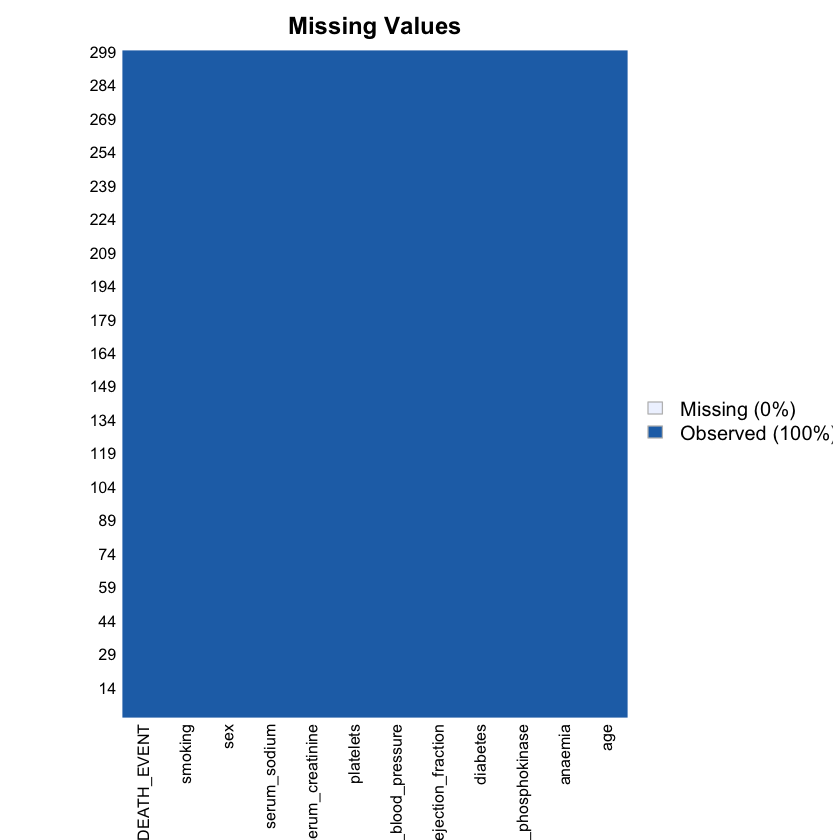

In [10]:
missmap(HrtFl, main= "Missing Values")

In [35]:
#data has no missing values

In [8]:
Base_Model <- glm(DEATH_EVENT ~ smoking + sex + diabetes + anaemia + age + high_blood_pressure + creatinine_phosphokinase + ejection_fraction + platelets + serum_creatinine + serum_sodium, data= HrtFl, family="binomial")

In [9]:
#creating a base model

In [10]:
Base_Model


Call:  glm(formula = DEATH_EVENT ~ smoking + sex + diabetes + anaemia + 
    age + high_blood_pressure + creatinine_phosphokinase + ejection_fraction + 
    platelets + serum_creatinine + serum_sodium, family = "binomial", 
    data = HrtFl)

Coefficients:
             (Intercept)                   smoking                       sex  
               4.964e+00                 1.356e-01                -3.990e-01  
                diabetes                   anaemia                       age  
               1.514e-01                 4.179e-01                 5.569e-02  
     high_blood_pressure  creatinine_phosphokinase         ejection_fraction  
               4.189e-01                 2.905e-04                -7.032e-02  
               platelets          serum_creatinine              serum_sodium  
              -7.094e-07                 6.619e-01                -5.667e-02  

Degrees of Freedom: 298 Total (i.e. Null);  287 Residual
Null Deviance:	    375.3 
Residual Deviance: 294.3 	

### Predicting Risk of Heart Failure

In [11]:
Probabilities <- predict(Base_Model, type = "response")
HrtFl$Predicted <- ifelse(Probabilities > .5, 1, 0)

### Changing my Predictor and Target Variables to Factors in order to run a Confusion Matrix:

In [12]:
HrtFl$Predicted <- as.factor(HrtFl$Predicted)
HrtFl$DEATH_EVENT <- as.factor(HrtFl$DEATH_EVENT)

In [13]:
#Confusion Matrix
conf_mat <- caret::confusionMatrix(HrtFl$Predicted, HrtFl$DEATH_EVENT)
conf_mat

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 183  49
         1  20  47
                                          
               Accuracy : 0.7692          
                 95% CI : (0.7173, 0.8158)
    No Information Rate : 0.6789          
    P-Value [Acc > NIR] : 0.0003752       
                                          
                  Kappa : 0.4249          
                                          
 Mcnemar's Test P-Value : 0.0007495       
                                          
            Sensitivity : 0.9015          
            Specificity : 0.4896          
         Pos Pred Value : 0.7888          
         Neg Pred Value : 0.7015          
             Prevalence : 0.6789          
         Detection Rate : 0.6120          
   Detection Prevalence : 0.7759          
      Balanced Accuracy : 0.6955          
                                          
       'Positive' Class : 0               
                              

### Above, the model is showing about 77% accurate. And successfully predicted 183 cases of not having heart failure, while incorrectly predicting 49 cases that indeed did have a heart failure. And incorrectly predicted 20 cases of heart failure that did not have a heart failure, as well as 47 cases correctly predicted to have a heart failure.

In [14]:
str(HrtFl)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : int  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: int  582 7861 146 111 160 47 246 315 157 123 ...
 $ diabetes                : int  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : int  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : int  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : int  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : int  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : int  0 0 1 0 0 1 0 1 0 1 ...
 $ DEATH_EVENT             : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 2 2 2 2 ...
 $ Predicted               : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 1 1 2 ...


In [15]:
#Logit Linearity
#Changing data to numeric
HrtFl$anaemia <- as.numeric(HrtFl$anaemia)
HrtFl$diabetes <- as.numeric(HrtFl$diabetes)
HrtFl$sex <- as.numeric(HrtFl$sex)
HrtFl$smoking <- as.numeric(HrtFl$smoking)
HrtFl$high_blood_pressure <- as.numeric(HrtFl$high_blood_pressure)
HrtFl$serum_sodium <- as.numeric(HrtFl$serum_sodium)
HrtFl$creatinine_phosphokinase <- as.numeric(HrtFl$creatinine_phosphokinase)
HrtFl$ejection_fraction <- as.numeric(HrtFl$ejection_fraction)
HrtFl$Predicted <- as.numeric(HrtFl$Predicted)
HrtFl$DEATH_EVENT <- as.numeric(HrtFl$DEATH_EVENT)

In [16]:
str(HrtFl)

'data.frame':	299 obs. of  13 variables:
 $ age                     : num  75 55 65 50 65 90 75 60 65 80 ...
 $ anaemia                 : num  0 0 0 1 1 1 1 1 0 1 ...
 $ creatinine_phosphokinase: num  582 7861 146 111 160 ...
 $ diabetes                : num  0 0 0 0 1 0 0 1 0 0 ...
 $ ejection_fraction       : num  20 38 20 20 20 40 15 60 65 35 ...
 $ high_blood_pressure     : num  1 0 0 0 0 1 0 0 0 1 ...
 $ platelets               : num  265000 263358 162000 210000 327000 ...
 $ serum_creatinine        : num  1.9 1.1 1.3 1.9 2.7 2.1 1.2 1.1 1.5 9.4 ...
 $ serum_sodium            : num  130 136 129 137 116 132 137 131 138 133 ...
 $ sex                     : num  1 1 1 1 0 1 1 1 0 1 ...
 $ smoking                 : num  0 0 1 0 0 1 0 1 0 1 ...
 $ DEATH_EVENT             : num  2 2 2 2 2 2 2 2 2 2 ...
 $ Predicted               : num  2 2 2 1 2 2 2 1 1 2 ...


In [17]:
### Changed datatypes to numeric so the code below will select it for prediction analysis below:

In [18]:
HrtFl1 <- HrtFl %>% 
dplyr::select_if(is.numeric)

predictors <- colnames(HrtFl1)

HrtFl2 <- HrtFl1 %>%
mutate(logit=log(Probabilities/(1-Probabilities))) %>%
gather(key= "predictors", value="predictor.value", -logit)

In [19]:
#The repr library is needed to be able to run the code necessary to resize the plots larger:
#options(repr.plot.width=14, repr.plot.height=14) this code is making the size 14X14 and is much easier to read
library("repr")

`geom_smooth()` using formula 'y ~ x'



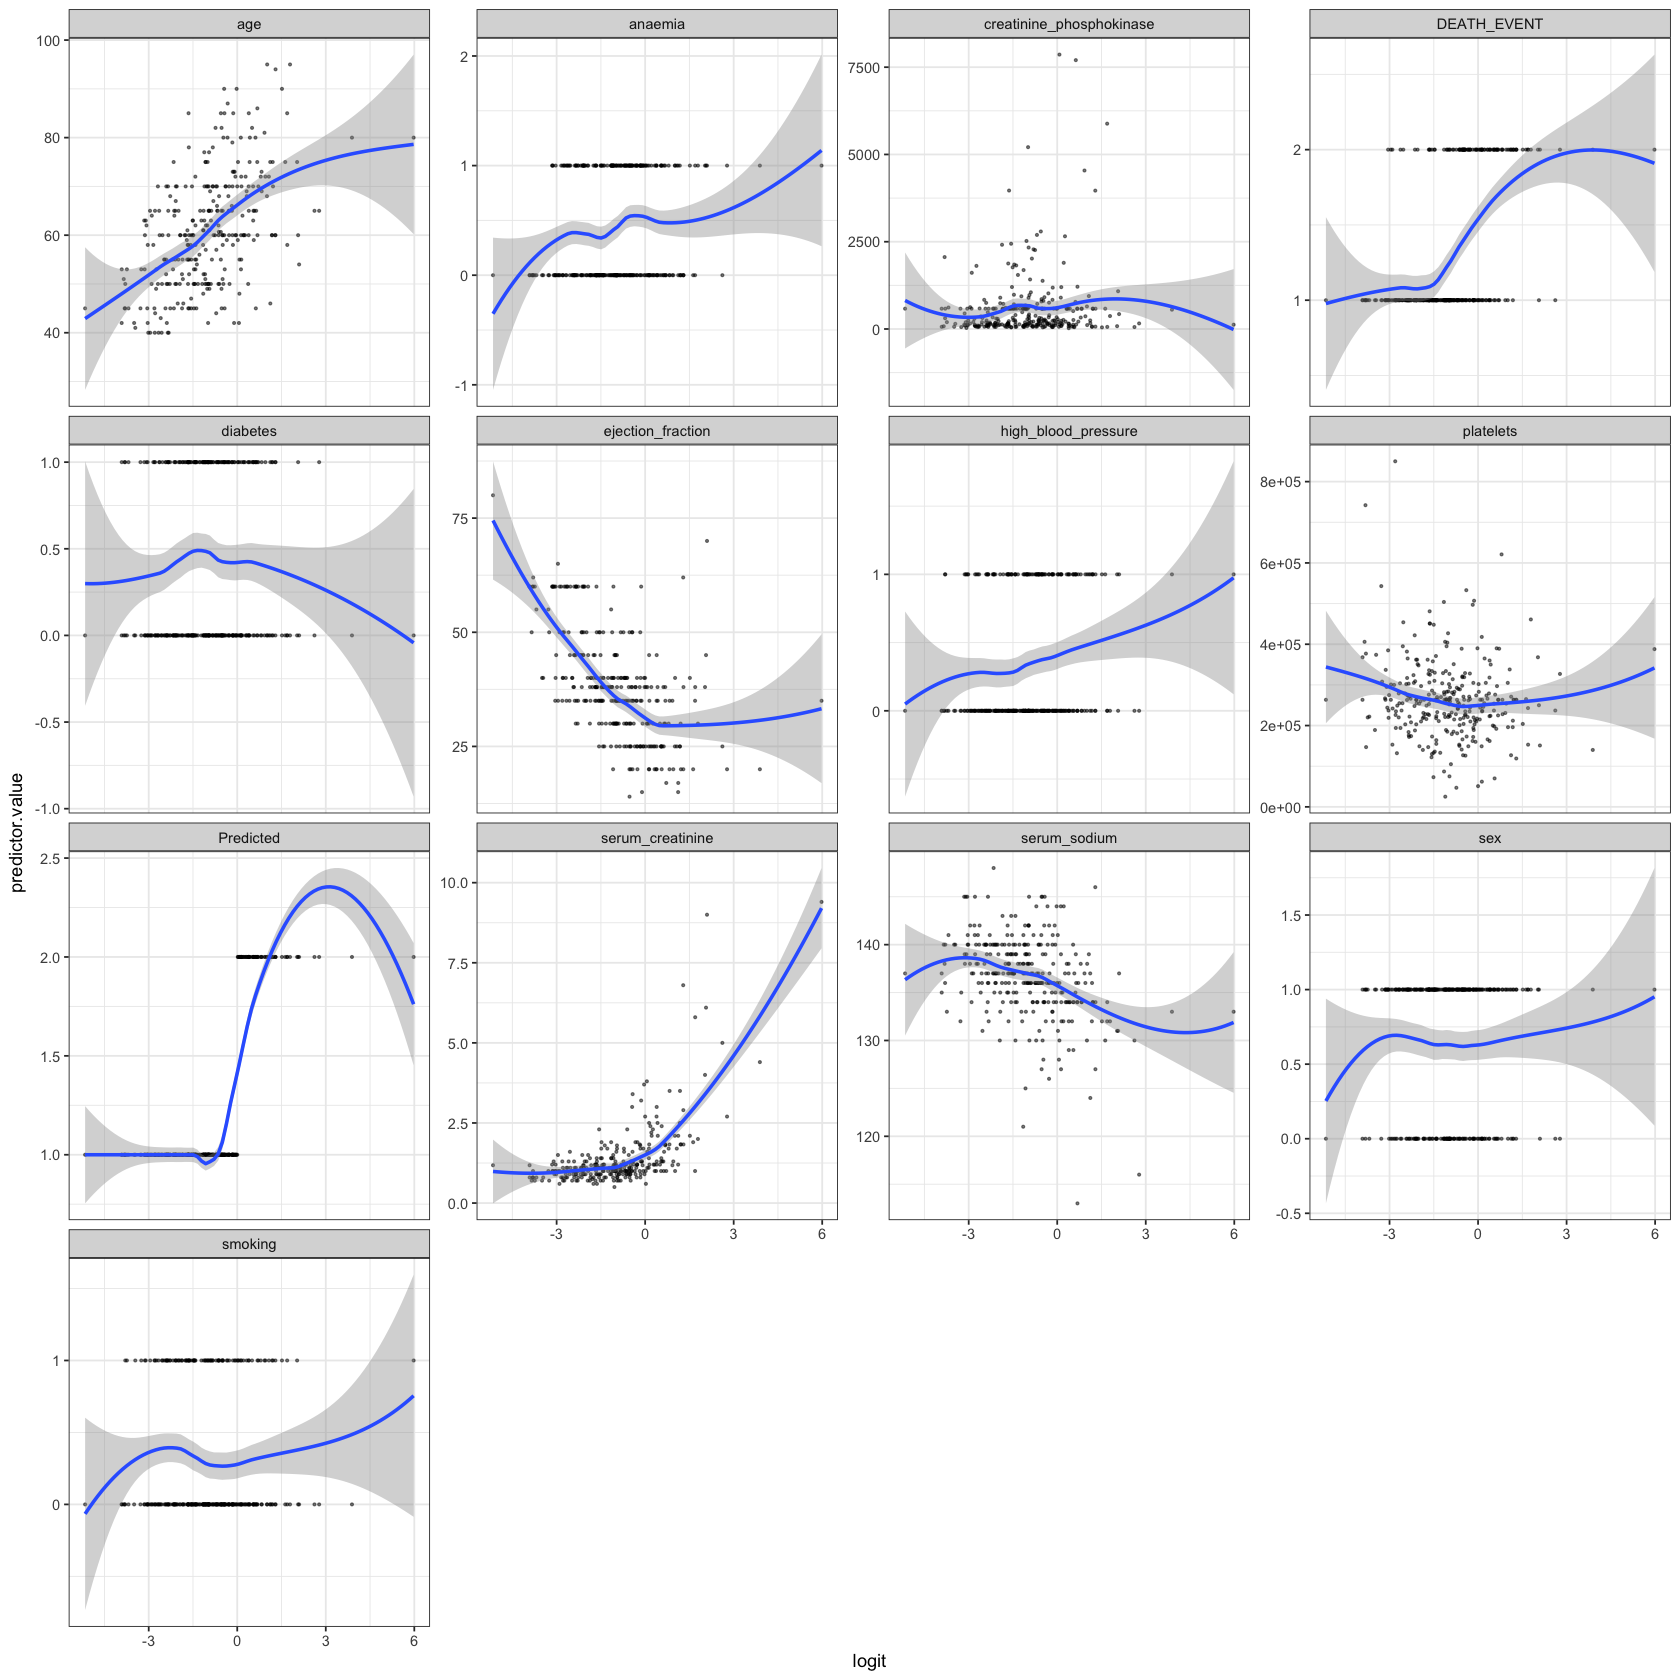

In [20]:
options(repr.plot.width=14, repr.plot.height=14)
ggplot(HrtFl2, aes(logit, predictor.value))+
geom_point(size=.5, alpha=.5)+
geom_smooth(method= "loess")+
theme_bw()+
facet_wrap(~predictors, scales="free_y")

### Beautiful!

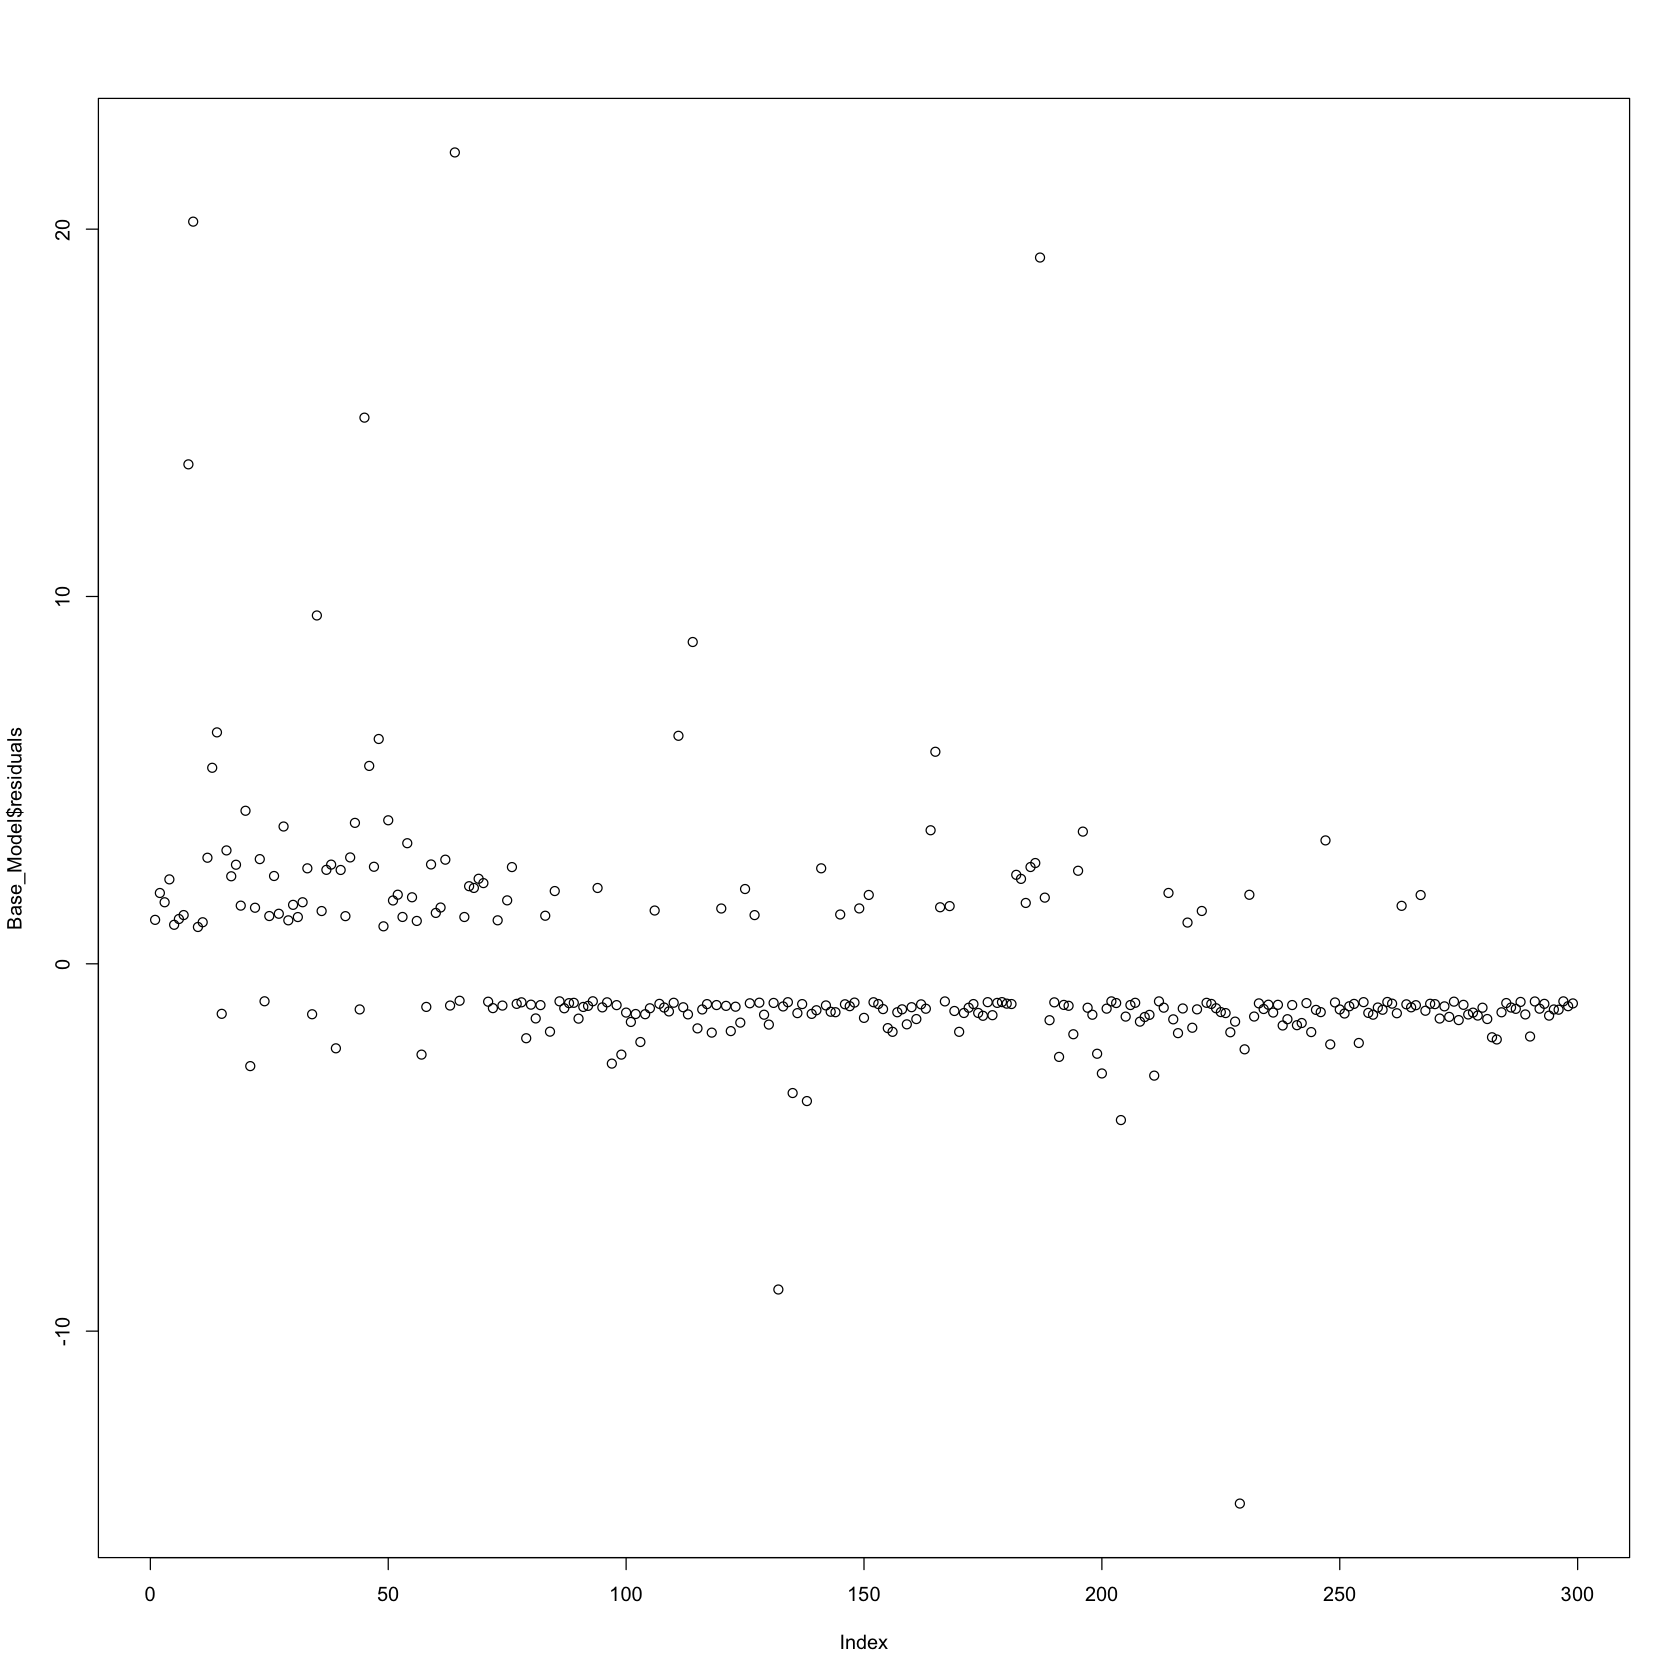

In [21]:
#Graphing the errors
plot(Base_Model$residuals)

In [22]:
#Durbin-Watson Test
dwtest(Base_Model, alternative="two.sided")


	Durbin-Watson test

data:  Base_Model
DW = 1.2584, p-value = 1.122e-10
alternative hypothesis: true autocorrelation is not 0


In [23]:
#p value is significant, so looking at the DW statistic it is between 1 and 3 so assumption of indep. errors is not violated

In [24]:
infl <- influence.measures(Base_Model)
summary(infl)

Potentially influential observations of
	 glm(formula = DEATH_EVENT ~ smoking + sex + diabetes + anaemia +      age + high_blood_pressure + creatinine_phosphokinase + ejection_fraction +      platelets + serum_creatinine + serum_sodium, family = "binomial",      data = HrtFl) :

    dfb.1_ dfb.smkn dfb.sex dfb.dbts dfb.anam dfb.age dfb.hg__ dfb.crt_
2    0.08  -0.07     0.02   -0.09     0.06     0.01   -0.04     0.72   
8    0.10   0.11     0.08    0.08     0.12    -0.07   -0.08    -0.02   
9   -0.01  -0.02    -0.07   -0.09    -0.10    -0.05   -0.08    -0.06   
20   0.43   0.03    -0.15    0.06     0.16    -0.16   -0.09     0.06   
29  -0.01  -0.02     0.03   -0.02     0.04    -0.03    0.00    -0.01   
45  -0.08   0.00    -0.07    0.08     0.06    -0.05   -0.08     0.00   
53  -0.16   0.03    -0.07    0.07    -0.01    -0.02    0.00     0.16   
61  -0.02  -0.06     0.07    0.10     0.04    -0.03    0.14     0.53   
64  -0.13  -0.11     0.12   -0.08    -0.10    -0.15   -0.06    -0.08   


In [25]:
#Checking outliers

In [26]:
summary(Base_Model)


Call:
glm(formula = DEATH_EVENT ~ smoking + sex + diabetes + anaemia + 
    age + high_blood_pressure + creatinine_phosphokinase + ejection_fraction + 
    platelets + serum_creatinine + serum_sodium, family = "binomial", 
    data = HrtFl)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3184  -0.7692  -0.4436   0.8293   2.4880  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)               4.964e+00  4.601e+00   1.079 0.280625    
smoking                   1.356e-01  3.486e-01   0.389 0.697300    
sex                      -3.990e-01  3.508e-01  -1.137 0.255394    
diabetes                  1.514e-01  2.974e-01   0.509 0.610644    
anaemia                   4.179e-01  3.009e-01   1.389 0.164904    
age                       5.569e-02  1.313e-02   4.241 2.23e-05 ***
high_blood_pressure       4.189e-01  3.061e-01   1.369 0.171092    
creatinine_phosphokinase  2.905e-04  1.428e-04   2.034 0.041907 *  
ejection_fraction

### Results show the biometric features most significant in influencing heart failure are age, ejection fraction, serum creatinine, and creatinine phosphokinase. Note here that this is also confirming the results from the random forest model in related notebook.

In [32]:
### Below roc plot

In [31]:
length(HrtFl$DEATH_EVENT)

length(HrtFl$Predicted)


[1] 299

[1] 299

In [27]:
#roc plot
suppressPackageStartupMessages(library(pROC))

In [28]:
levels=base::levels(as.factor(predictors))

Setting levels: control = 1, case = 2

Setting direction: controls < cases



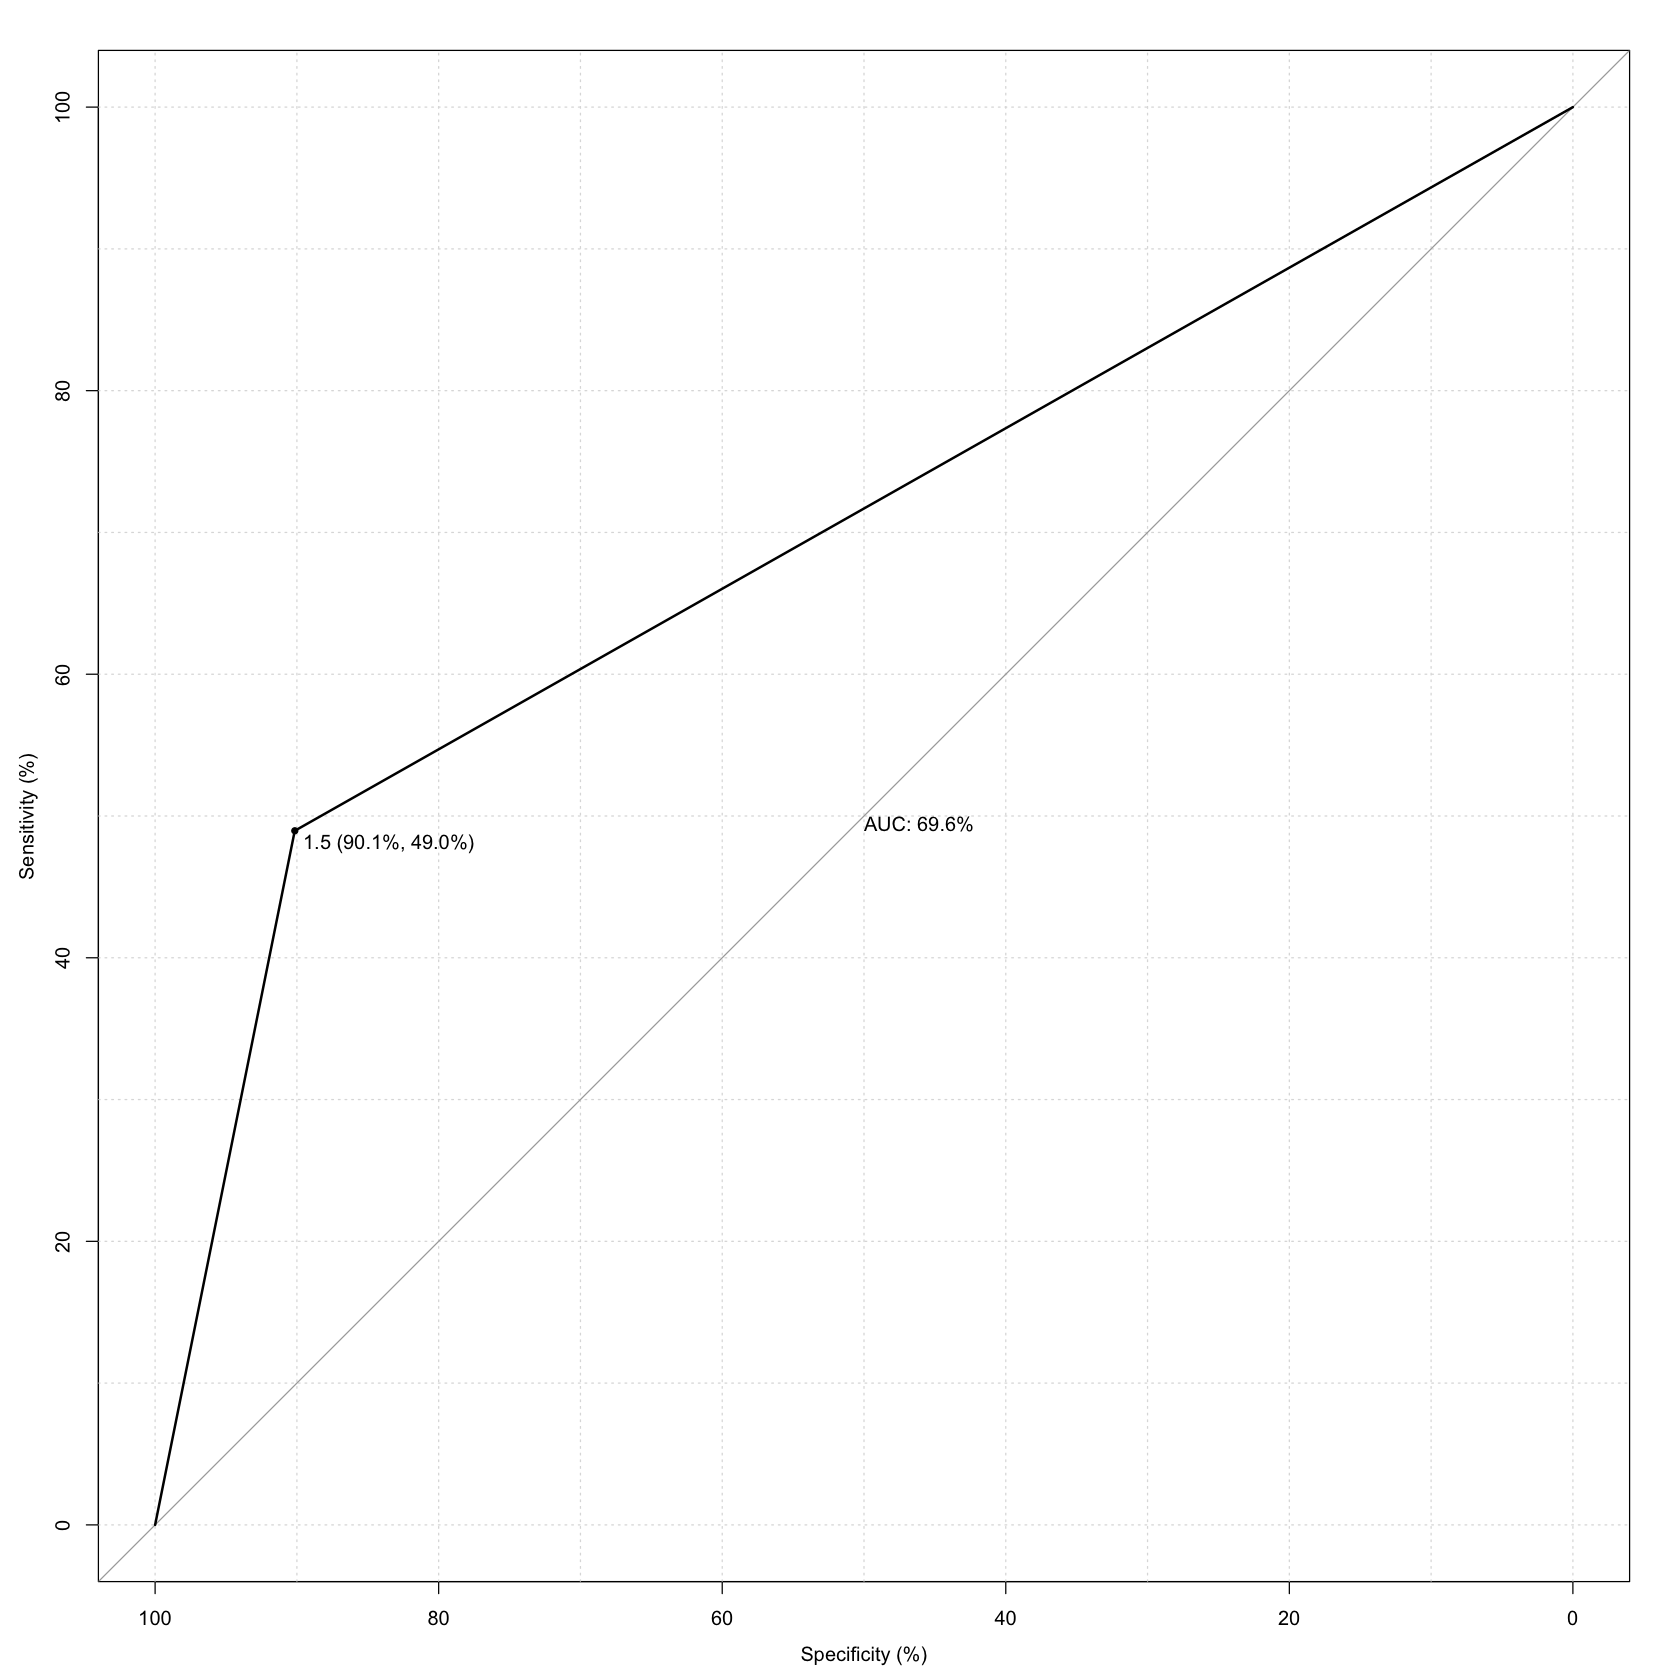

In [29]:
# create ROC curve matrix
roc_object <- roc(HrtFl$DEATH_EVENT, HrtFl$Predicted,
    percent = TRUE,
    direction = c("auto"),
    auc=TRUE,
    auc.polygon=TRUE)

plot(roc_object, print.auc=TRUE, grid=TRUE, print.thres="best", print.thres.best.method="closest.topleft")

### AUC is 69.6%, so there is a 69.6% chance that the model will be able to distinguish between the positive class and negative class.